In [1]:
# Import important libraries. Numpy for matrix computation, matplotlib for plotting, 
#                             astropy units modules so we don't have to memorize numbers
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as c
import astropy.units as u
%matplotlib inline 
# %matplotlib notebook #For interactive plots

# Notebook for Two Body Problem to Small N body problem

## Derivation of the differential equations

### Newton's Forces
First, for two bodies, each creates a force on the other according to 

$$ \ddot{\vec{r}_1} = -Gm_1 m_2\frac{ \vec{r}_1 - \vec{r}_2}{|\vec{r}_1 - \vec{r}_2|^3}$$

$$ \ddot{\vec{r}_2} = Gm_1 m_2\frac{ \vec{r}_1 - \vec{r}_2}{|\vec{r}_1 - \vec{r}_2|^3}$$

For $N$ bodies, we would find 

$$ \ddot{\vec{r}_i} = - \sum_{j=1,j\neq i}^{N}Gm_i m_j\frac{ \vec{r}_i - \vec{r}_j}{|\vec{r}_i - \vec{r}_j|^3}$$

Of course, these are vectors. That means, in 3D space, solving $3N$ second order, coupled differential equations. This large number of equations is difficult in itself. However, that neglects the stiffness that can develop spatially and temporally when some particles are very close to each other and others are very far away. 


### Lagrangian formalism

For a small number of particles, we can play some physics and math games to formulate the problem more simply. First, we can use Lagrangian mechanics instead of Newtonian mechanics. 

The Lagrangian formalism uses the Lagrangian $L=T-U$ where $T$ is the total kinetic energy of the system and $U$ is the total potential energy of the system. For gravity with $N$ particles, the total energy felt by a single particle 

$$ U = - \sum_{i=1}^{N}\sum_{j=1}^{i-1}\frac{G m_i m_j}{\left| \vec{r}_i -\vec{r}_j \right|} $$

Why does the $j$ sum only run to $i$? If both sums ran from $1$ to $N$, then we would double count the energy of each interaction. Also, we would count self interactions when $i=j$, which is problematic mathematically and non-physical.

The kinetic energy is 

$$ T = \frac{1}{2} \sum_{i=1}^{N} m_i \left| \dot{\vec{r}}_i \right|^2 $$

Calculating the Lagrangian allows us to use the *Euler-Lagrange Equations*:

$$ \frac{\partial L}{\partial q_i^\mu} = \frac{d}{dt} \left[ \frac{\partial L}{\partial \dot{q}_i^\mu} \right]$$ 

where $q_i^\mu = \vec{q}_i$ is a coordinate vector for a particle and $i\in[1,N]$ and $\mu\in[1,2,3]$.


Let's show the Euler Lagrange equations give us back the Newtonian force equations:

$$ L = T-U = \frac{1}{2} \sum_{i=1}^{N} m_i \left| \dot{\vec{r}}_i \right|^2 
+ \sum_{i=1}^{N}\sum_{j=1}^{i-1}\frac{G m_i m_j}{\left| \vec{r}_i -\vec{r}_j \right|} $$

Looking at the $\dot{r}_k^\mu$ dependence, we get

$$ \frac{\partial L}{\partial \dot{r}_k^\mu} = m_k \dot{r}_k^\mu $$

where only one term, $i=k$ remains from the summation over $N$. Next for the $r_k^\mu$ dependence, the double sum is more complicated. Specifically, we will get two terms, when $i=k$ and when $j=k$. First, if $i=k$, we just complete the $j$ sum as expected. If $j=k$, then it must be that $k\leq i-1$, which implies $i \geq k +1$ which restricts the $i$ sum. This argument gives

$$\frac{\partial L}{\partial r_k^\mu} 
= \frac{\partial }{\partial r_k^\mu}  \left( 
  \sum_{j=1}^{k-1}\frac{G m_k m_j}{\left| \vec{r}_k -\vec{r}_j \right|} +
  \sum_{i=k+1}^{N}\frac{G m_i m_k}{\left| \vec{r}_i -\vec{r}_k \right|} \right)$$
  
$$\frac{\partial L}{\partial r_k^\mu} 
= \frac{\partial }{\partial r_k^\mu}  \left( 
  \sum_{i=1,i\neq k}^{N}\frac{G m_k m_i}{\left| \vec{r}_k -\vec{r}_i \right|} \right)$$
  
which simplifies to a single sum. Taking the derivative, we get 

$$\frac{\partial L}{\partial r_k^\mu} 
= \sum_{i=1,i\neq k}^{N} G m_k m_i
  \frac{\partial }{\partial r_k^\mu} \left| \vec{r}_k -\vec{r}_i \right|^{-1}
  = \sum_{i=1,i\neq k}^{N} G m_k m_i \frac{\partial }{\partial r_k^\mu}
  \left[ \left(\vec{r}_k -\vec{r}_i  \right) \cdot \left(\vec{r}_k -\vec{r}_i  \right)\right]^{-1/2}
   = \sum_{i=1,i\neq k}^{N} G m_k m_i \frac{\partial }{\partial r_k^\mu}
  \left[ \sum_{\nu=1}^{3}\left(r_k^\nu -r^\nu_i  \right) \cdot \left(r^\nu_k -r^\nu_i  \right)\right]^{-1/2}
  $$
  
$$\frac{\partial L}{\partial r_k^\mu} 
 = \sum_{i=1,i\neq k}^{N} G m_k m_i \frac{-1}{2} 
 \left[ \left(\vec{r}_k -\vec{r}_i  \right) \cdot \left(\vec{r}_k -\vec{r}_i  \right)\right]^{-3/2}
 \frac{\partial }{\partial r_k^\mu} 
  \left[ \sum_{\nu=1}^{3}\left(r_k^\nu -r^\nu_i  \right) \cdot \left(r^\nu_k -r^\nu_i  \right)\right]
$$

$$\frac{\partial L}{\partial r_k^\mu} 
 = \sum_{i=1,i\neq k}^{N} G m_k m_i \frac{-1}{2} 
 \left| \vec{r}_k -\vec{r}_i  \right|^{-3}
 \frac{\partial }{\partial r_k^\mu} 
  \left[ \left(r_k^\mu -r^\mu_i  \right) \cdot \left(r^\mu_k -r^\mu_i  \right)\right]
$$

$$\frac{\partial L}{\partial r_k^\mu} 
 = \sum_{i=1,i\neq k}^{N} G m_k m_i \frac{-1}{2} 
 \left| \vec{r}_k -\vec{r}_i  \right|^{-3}
 \frac{\partial }{\partial r_k^\mu} 
  \left[ (r_k^\mu)^2  -2 r^\mu_i  r_k^\mu + (r^\mu_i)^2 \right]
$$

$$\frac{\partial L}{\partial r_k^\mu} 
 = \sum_{i=1,i\neq k}^{N} G m_k m_i \frac{-1}{2} 
 \left| \vec{r}_k -\vec{r}_i  \right|^{-3}
  \left( 2 r_k^\mu  -2 r^\mu_i  \right)
  = - \sum_{i=1,i\neq k}^{N} \frac{G m_k m_i}{\left| \vec{r}_k -\vec{r}_i  \right|^{3}} 
  \left( r_k^\mu  - r^\mu_i  \right)
$$


Using the Euler-Lagrange equation, the equation of motion matches the Newtonian case:

$$ - \sum_{i=1,i\neq k}^{N} \frac{G m_k m_i}{\left| \vec{r}_k -\vec{r}_i  \right|^{3}} 
  \left( r_k^\mu  - r^\mu_i  \right) = \frac{d}{dt} \left[ m_k \dot{r}_k^\mu  \right] 
 $$
 
$$ - \sum_{i=1,i\neq k}^{N} \frac{G m_k m_i}{\left| \vec{r}_k -\vec{r}_i  \right|^{3}} 
  \left( \vec{r}_k  - \vec{r}_i  \right) =  m_k \ddot{\vec{r}}_k
 $$
 
This means we have the correct Lagrangian function!!

From this, we can move to the Hamiltonian formalism which will make the entire process simpler.





### Hamiltonian formalism

Where as the Lagrangian is a function of coordinates $q_i^\mu$ and velocities $\dot{q}_i^\mu$, the Hamiltonian is a function of coordinates and momenta $p_i^\mu = m_i \dot{q}_i^\mu$. The Hamiltonian is basically the total energy of the system, but is defined in general as 

$$ H = \sum_{i=1}^{N} \vec{p}_i \cdot  \dot{\vec{q}}_i - L$$

In our case, this is 

$$ H = \sum_{i=1}^{N} \vec{p}_i \cdot  \dot{\vec{r}}_i - \frac{1}{2} \sum_{i=1}^{N} m_i \left| \dot{\vec{r}}_i \right|^2 - \sum_{i=1}^{N}\sum_{j=1}^{i-1}\frac{G m_i m_j}{\left| \vec{r}_i -\vec{r}_j \right|}$$

But note that  $\vec{p}_i \cdot  \dot{\vec{r}}_i =  m_i \left| \dot{\vec{r}}_i \right|^2$. Therefore, our hamiltonian is 

$$ H = \sum_{i=1}^{N} \frac{\left| \vec{p}_i \right|^2}{2 m_i}  
- \sum_{i=1}^{N}\sum_{j=1}^{i-1}\frac{G m_i m_j}{\left| \vec{r}_i -\vec{r}_j \right|}$$

The reason we want to end up in the Hamiltonian formalism is it gives us $6N$ first order differential equations instead of $3N$ second order differential equations. First order differential equations are easier to integrate on a computer, and require simpler computational methods. 

Hamilton's equations are 
 
$$ \dot{p}_k^\mu = - \frac{\partial H}{\partial q_k^\mu} $$
 
$$ \dot{q}_k^\mu = \frac{\partial H}{\partial p_k^\mu} $$

For our case, these are 
$$ \dot{\vec{p}}_k = - \sum_{i=1,i\neq k}^{N} \frac{G m_k m_i}{\left| \vec{r}_k -\vec{r}_i  \right|^{3}} 
  \left( \vec{r}_k  - \vec{r}_i  \right) $$
 
$$ \dot{\vec{r}}_k =  \frac{\vec{p}_k }{m_k}  $$

Note that this makes the problem of summation clear: to calculate the new positions and momenta of each particle, we have to perform a sum of $N-1$ terms $N$ times. This process will then take a time proportional to $N^2$.

Let's go ahead and make some code to run this!

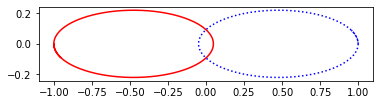

In [2]:
def rk4(x,t,h,func,params): #x is some quantity to be integrated, which conforms to dot(x) = func
                            #t is initial time, h is timestep. 
                            #Params are unchanging parameters (mass, etc.)in a vector
    k1 = func(x,t,params)
    k2 = func(x+k1*0.5*h,t+0.5*h,params)
    k3 = func(x+k2*0.5*h,t+0.5*h,params)
    k4 = func(x+k3*h,t+h,params)
    return x+h/6.0*(k1+2*k2+2*k3+k4), t+h

G = c.G.to('pc^3 M_sun^(-1) Myr^(-2)').value
b = 0.01*c.pc.value
p0 = 1*(u.km/u.s*c.M_sun).to('M_sun pc Myr^-1').value

def nBody(x,t,masses): #Assume x is a matrix with dimensions [N,6]. In each column N, we have 6 variables. 
                  #The first three are positions and the second three are momenta
    xdot = x.copy()*0.0 #initialize an empty matrix of zeros with the right dimensions
    massArr= np.tile(masses,[3,1]).transpose() #tile an array of masses so we can divide by the correct shape matrix
    xdot[:,:3] = x[:,3:]/massArr #calculate position time derivative dot{r}
    outer = G * np.outer(masses,masses) # produce NxN matrix for summation (instead of for loops because arrays=FAST)
    np.fill_diagonal(outer,0) # want no self interactions - i.e. m1 does not interact with m1
    x1 = np.subtract.outer(x[:,0],x[:,0]) # subtract xi1- xj1 for particles i, j -> gives NxN array
    x2 = np.subtract.outer(x[:,1],x[:,1]) # subtract xi2- xj2 for particles i, j -> gives NxN array
    x3 = np.subtract.outer(x[:,2],x[:,2]) # subtract xi3- xj3 for particles i, j -> gives NxN array
    rad = np.sqrt(x1**2 + x2**2 + x3**2)  # NxN array with distance between each particle pair - should be symmetric
    np.fill_diagonal(rad,1) # fill with 1 where we filled outer (the masses) with 0. This avoide div by 0 error
    xdot[:,3] = -1*np.sum(outer*(rad**-3)*x1,axis=1)
    xdot[:,4] = -1*np.sum(outer*(rad**-3)*x2,axis=1)
    xdot[:,5] = -1*np.sum(outer*(rad**-3)*x3,axis=1)
    return xdot


def nBodySoft(x,t,masses): #Assume x is a matrix with dimensions [N,6]. In each column N, we have 6 variables. 
                  #The first three are positions and the second three are momenta
    xdot = x.copy()*0.0 #initialize an empty matrix of zeros with the right dimensions
    massArr= np.tile(masses,[3,1]).transpose() #tile an array of masses so we can divide by the correct shape matrix
    xdot[:,:3] = x[:,3:]/massArr #calculate position time derivative dot{r}
    outer = G * np.outer(masses,masses) # produce NxN matrix for summation (instead of for loops because arrays=FAST)
    np.fill_diagonal(outer,0) # want no self interactions - i.e. m1 does not interact with m1
    x1 = np.subtract.outer(x[:,0],x[:,0]) # subtract xi1- xj1 for particles i, j -> gives NxN array
    x2 = np.subtract.outer(x[:,1],x[:,1]) # subtract xi2- xj2 for particles i, j -> gives NxN array
    x3 = np.subtract.outer(x[:,2],x[:,2]) # subtract xi3- xj3 for particles i, j -> gives NxN array
    rad = np.sqrt(x1**2 + x2**2 + x3**2)+b  # NxN array with distance between each particle pair - should be symmetric
    np.fill_diagonal(rad,1) # fill with 1 where we filled outer (the masses) with 0. This avoide div by 0 error
    xdot[:,3] = -1*np.sum(outer*(rad**-3)*x1,axis=1)
    xdot[:,4] = -1*np.sum(outer*(rad**-3)*x2,axis=1)
    xdot[:,5] = -1*np.sum(outer*(rad**-3)*x3,axis=1)
    return xdot

m1 = c.M_sun.to('M_sun').value
m2 = c.M_jup.to('M_sun').value
T = 12 #in years
omega = 1 / T
R = 5.2 #in AU

X = np.array([[0,0,0,0,0,0],[R,0,0,0,2/3 * m2*np.sqrt(2*G*m1/R),0]])
M = np.array([m1,m2])

X = np.array([[-1, 0, 0, 0, -0.01*p0, 0], [1, 0, 0, 0, 0.01*p0, 0]])
M = np.array([1,1])

Nsteps = 8000
h = 0.01

outPuts = np.zeros([Nsteps+1,len(M),6])
outPuts[0] = X.copy()

for i in range(Nsteps):
    out, t = rk4(X,0.0,h,nBody,M)
    X = out
    outPuts[i+1] = out
plt.plot(outPuts[:,0,0],outPuts[:,0,1],'r-')
plt.plot(outPuts[:,1,0],outPuts[:,1,1],'b:')

ax = plt.gca()
ax.set_aspect('equal')
plt.show()



In [3]:
def verlet(x,t,h,func,params): #x is matrix of N particles by 6 coordinates 
                                #(0,1,2 are coordinates, 3,4,5 are momenta)
                               #t is initial time, h is timestep. 
                               #Params are unchanging parameters (mass, etc.)in a vector
    N,m = x.shape
    coeff1 = [0,0,0,0.5,0.5,0.5]
    coeff2 = [1,1,1,0.5,0.5,0.5]
    x = x+func(x,t,params)*h*np.array([coeff1]*N)
    x = x+func(x,t,params)*h*np.array([coeff2]*N)
    return x, t+h

def ruth(x,t,h,func,params): #x is matrix of N particles by 6 coordinates 
                                #(0,1,2 are coordinates, 3,4,5 are momenta)
                               #t is initial time, h is timestep. 
                               #Params are unchanging parameters (mass, etc.)in a vector
    N,m = x.shape
    coeff1 = [1.0,1.0,1.0,-1.0/24,-1.0/24,-1.0/24]
    coeff2 = [-2.0/3,-2.0/3,-2.0/3,3.0/4,3.0/4,3.0/4]
    coeff3 = [2.0/3,2.0/3,2.0/3,7.0/24,7.0/24,7.0/24]
    x = x+func(x,t,params)*h*np.array([coeff1]*N)
    x = x+func(x,t,params)*h*np.array([coeff2]*N)
    x = x+func(x,t,params)*h*np.array([coeff3]*N)
    return x, t+h
a = 2**(1/3)
A = 1/(2*(2-a))
B = (1-a)/(2*(2-a))
C = 1/(2-a)
D = -1*a/(2-a)

def ruth4(x,t,h,func,params): #x is matrix of N particles by 6 coordinates 
                                #(0,1,2 are coordinates, 3,4,5 are momenta)
                               #t is initial time, h is timestep. 
                               #Params are unchanging parameters (mass, etc.)in a vector
    N,m = x.shape
    coeff1 = [A,A,A,C,C,C]
    coeff2 = [B,B,B,D,D,D]
    coeff3 = [B,B,B,C,C,C]
    coeff4 = [A,A,A,0,0,0]
    x = x+func(x,t,params)*h*np.array([coeff1]*N)
    x = x+func(x,t,params)*h*np.array([coeff2]*N)
    x = x+func(x,t,params)*h*np.array([coeff3]*N)
    x = x+func(x,t,params)*h*np.array([coeff4]*N)
    return x, t+h

Mess with the above - for example, change the mass ratio to be 5,1 instead of 1,1. This will result in an unstable orbit. But is that reality? Crank h down to 0.01 and Nsteps up to 10000 for the same mass ratio. You will find a very stable orbit! So we hit the problem with Runge Kutta integration - errors can rapidly build up and lead to unphysical results. This will only get worse with more masses!

On that note, let's try the 3 body problem.

In [4]:
from mpl_toolkits import mplot3d
from matplotlib.animation import FuncAnimation

In [5]:

X = np.array([[-1,0,0,0,-0.05*p0,0],[1,0,0,0,0.05*p0,0],[0,1,3,0,0,-0.005*p0]])
M = np.array([0.9,1.1,1])

Nsteps = 150000
h = 0.005

outPutsTrue = np.zeros([Nsteps+1,len(M),6])
outPutsTrue[0] = X.copy()

for i in range(Nsteps):
    out, t = rk4(X,0.0,h,nBodySoft,M) 
    X = out
    outPutsTrue[i+1] = out

In [6]:
X = np.array([[-1,0,0,0,-0.05*p0,0],[1,0,0,0,0.05*p0,0],[0,1,3,0,0,-0.005*p0]])
M = np.array([0.9,1.1,1])

Nsteps = 15000
h = 0.05

outPutsRK = np.zeros([Nsteps+1,len(M),6])
outPutsRK[0] = X.copy()

for i in range(Nsteps):
    out, t = rk4(X,0.0,h,nBodySoft,M) 
    X = out
    outPutsRK[i+1] = out

In [7]:
X = np.array([[-1,0,0,0,-0.05*p0,0],[1,0,0,0,0.05*p0,0],[0,1,3,0,0,-0.005*p0]])
M = np.array([0.9,1.1,1])

Nsteps = 150000
h = 0.005

outPutsTrue2 = np.zeros([Nsteps+1,len(M),6])
outPutsTrue2[0] = X.copy()

for i in range(Nsteps):
    out, t = ruth4(X,0.0,h,nBodySoft,M) 
    X = out
    outPutsTrue2[i+1] = out

In [8]:
X = np.array([[-1,0,0,0,-0.05*p0,0],[1,0,0,0,0.05*p0,0],[0,1,3,0,0,-0.005*p0]])
M = np.array([0.9,1.1,1])

Nsteps = 15000
h = 0.05

outPutsSI = np.zeros([Nsteps+1,len(M),6])
outPutsSI[0] = X.copy()

for i in range(Nsteps):
    out, t = ruth4(X,0.0,h,nBodySoft,M) 
    X = out
    outPutsSI[i+1] = out

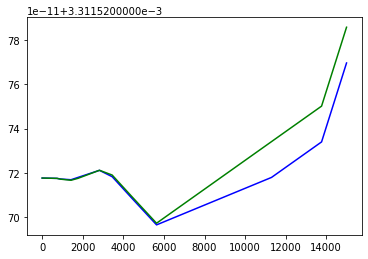

In [9]:
def error(out1, out2):
    Eps = (out1 - out2)**2
    eps = np.sqrt(np.sum(Eps[:,:,:], axis = (1,2)))
    return eps
plt.plot(error(outPutsTrue[1::10], outPutsRK[1:]),"b")
#plt.semilogy(error(outPutsTrue2[1::10], outPutsSI[1:]), "r")
plt.plot(error(outPutsTrue[1::10], outPutsSI[1:]), "g")
#plt.semilogy(error(outPutsTrue[1::10], outPutsTrue2[1::10]), "c")

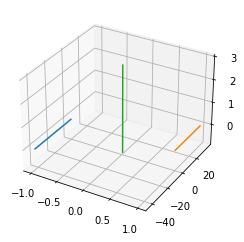

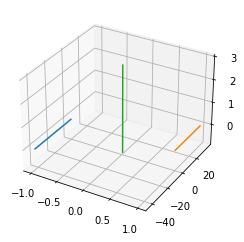

In [10]:
plt.clf()
fig = plt.figure(1)
ax = plt.axes(projection='3d')
ax.plot3D(outPutsTrue[:,0,0], outPutsTrue[:,0,1], outPutsTrue[:,0,2])
ax.plot3D(outPutsTrue[:,1,0], outPutsTrue[:,1,1], outPutsTrue[:,1,2])
ax.plot3D(outPutsTrue[:,2,0], outPutsTrue[:,2,1], outPutsTrue[:,2,2])

fig = plt.figure(2)
ax = plt.axes(projection='3d')
ax.plot3D(outPutsRK[:,0,0], outPutsRK[:,0,1], outPutsRK[:,0,2])
ax.plot3D(outPutsRK[:,1,0], outPutsRK[:,1,1], outPutsRK[:,1,2])
ax.plot3D(outPutsRK[:,2,0], outPutsRK[:,2,1], outPutsRK[:,2,2])

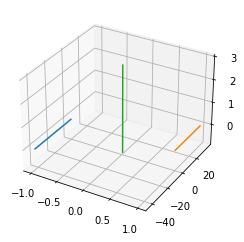

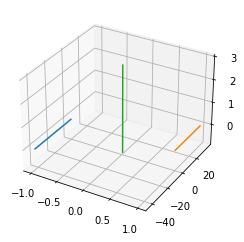

In [11]:
plt.clf()
fig = plt.figure(1)
ax = plt.axes(projection='3d')
ax.plot3D(outPutsTrue2[:,0,0], outPutsTrue2[:,0,1], outPutsTrue2[:,0,2])
ax.plot3D(outPutsTrue2[:,1,0], outPutsTrue2[:,1,1], outPutsTrue2[:,1,2])
ax.plot3D(outPutsTrue2[:,2,0], outPutsTrue2[:,2,1], outPutsTrue2[:,2,2])
fig = plt.figure(2)
ax = plt.axes(projection='3d')
ax.plot3D(outPutsSI[:,0,0], outPutsSI[:,0,1], outPutsSI[:,0,2])
ax.plot3D(outPutsSI[:,1,0], outPutsSI[:,1,1], outPutsSI[:,1,2])
ax.plot3D(outPutsSI[:,2,0], outPutsSI[:,2,1], outPutsSI[:,2,2])

IndexError: index 2 is out of bounds for axis 1 with size 2

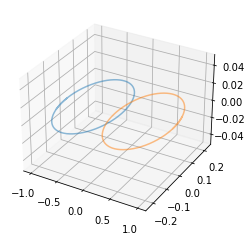

In [12]:
fig = plt.figure()
ax = plt.axes(projection='3d')


ax.plot3D(outPuts[:,0,0], outPuts[:,0,1], outPuts[:,0,2],alpha=0.5)
ax.plot3D(outPuts[:,1,0], outPuts[:,1,1], outPuts[:,1,2],alpha=0.5)
ax.plot3D(outPuts[:,2,0], outPuts[:,2,1], outPuts[:,2,2],alpha=0.5)
pnts = ax.scatter3D(outPuts[0,:,0], outPuts[0,:,1], outPuts[0,:,2],c='black')

def update(frame):
    global pnts
    pnts.set(visible=False)
    pnts = ax.scatter3D(outPuts[int(frame),:,0], outPuts[int(frame),:,1], outPuts[int(frame),:,2],c='black')
    return pnts
    
ani = FuncAnimation(fig, update, frames=np.linspace(0,Nsteps,100))

ani.save(r"3BodyAnimation.mp4", writer = 'ffmpeg', fps = 20)

So what can we do instead? We need an integrator that is better at keeping errors low. 


In [ ]:
X = np.array([[-1,0,0,0,-0.5,0],[1,0,0,0,0.5,0],[0,1,3,0,0,-0.05]])
M = np.array([0.9,1.1,1])

# X = np.array([[-1,0,0,0,-0.5,0],[1,0,0,0,0.5,0]])
# M = np.array([1,1])

X = np.array([[-1,0,0,0,-0.05*p0,0],[1,0,0,0,0.05*p0,0],[0,1,3,0,0,-0.005*p0]])
M = np.array([0.9,1.1,1])

Nsteps = 150000
h =0.01


outPuts = np.zeros([Nsteps+1,len(M),6])
outPuts[0] = X.copy()

b=1e-5
for i in range(Nsteps):
    out, t = ruth4(X,t,h,nBodySoft,M) 
    X = out
    outPuts[i+1] = out
plt.clf()

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(outPuts[:,0,0], outPuts[:,0,1], outPuts[:,0,2])
ax.plot3D(outPuts[:,1,0], outPuts[:,1,1], outPuts[:,1,2])
ax.plot3D(outPuts[:,2,0], outPuts[:,2,1], outPuts[:,2,2])

### Two Body with Hamiltonian Formulation

Now, let's simplify to the Two Body problem and see if we can learn anything that will make the coding for the above problem simpler. For just two masses, the equations are 

$$ \dot{\vec{p}}_1 = -\frac{G m_1 m_2}{\left| \vec{r}_1 -\vec{r}_2  \right|^{3}} 
  \left( \vec{r}_1  - \vec{r}_2  \right) \hspace{0.5in}
  \dot{\vec{p}}_2 = -\frac{G m_1 m_2}{\left| \vec{r}_2 -\vec{r}_1  \right|^{3}} 
  \left( \vec{r}_2  - \vec{r}_1  \right) $$
 
$$ \dot{\vec{r}}_1 =  \frac{\vec{p}_1 }{m_1} \hspace{0.5in}\dot{\vec{r}}_2 =  \frac{\vec{p}_2 }{m_2} $$



In [ ]:
def nBody(x,t,masses): 
    xdot = x.copy()*0.0 
    massArr= np.tile(masses,[3,1]).transpose() 
    xdot[:,:3] = x[:,3:]/massArr 
    outer = G * np.outer(masses,masses) 
    np.fill_diagonal(outer,0) 
    x1 = np.subtract.outer(x[:,0],x[:,0]) 
    x2 = np.subtract.outer(x[:,1],x[:,1])
    x3 = np.subtract.outer(x[:,2],x[:,2]) 
    rad = np.sqrt(x1**2 + x2**2 + x3**2)  
    np.fill_diagonal(rad,1) 
    xdot[:,3] = -1*np.sum(outer*(rad**-3)*x1,axis=1)
    xdot[:,4] = -1*np.sum(outer*(rad**-3)*x2,axis=1)
    xdot[:,5] = -1*np.sum(outer*(rad**-3)*x3,axis=1)
    return xdot

b = 1e-5
def nBodySoft(x,t,masses): 
    xdot = x.copy()*0.0 
    massArr= np.tile(masses,[3,1]).transpose() 
    xdot[:,:3] = x[:,3:]/massArr 
    outer = G * np.outer(masses,masses) 
    np.fill_diagonal(outer,0) 
    x1 = np.subtract.outer(x[:,0],x[:,0]) 
    x2 = np.subtract.outer(x[:,1],x[:,1]) 
    x3 = np.subtract.outer(x[:,2],x[:,2]) 
    rad = np.sqrt(x1**2 + x2**2 + x3**2)+b  
    np.fill_diagonal(rad,1) 
    xdot[:,3] = -1*np.sum(outer*(rad**-3)*x1,axis=1)
    xdot[:,4] = -1*np.sum(outer*(rad**-3)*x2,axis=1)
    xdot[:,5] = -1*np.sum(outer*(rad**-3)*x3,axis=1)
    return xdot

def rk4(x,t,h,func,params): 
    k1 = func(x,t,params)
    k2 = func(x+k1*0.5*h,t+0.5*h,params)
    k3 = func(x+k2*0.5*h,t+0.5*h,params)
    k4 = func(x+k3*h,t+h,params)
    return x+h/6.0*(k1+2*k2+2*k3+k4), t+h

def ruth4(x,t,h,func,params): 
    N,m = x.shape
    coeff1 = [A,A,A,C,C,C]
    coeff2 = [B,B,B,D,D,D]
    coeff3 = [B,B,B,C,C,C]
    coeff4 = [A,A,A,0,0,0]
    x = x+func(x,t,params)*h*np.array([coeff1]*N)
    x = x+func(x,t,params)*h*np.array([coeff2]*N)
    x = x+func(x,t,params)*h*np.array([coeff3]*N)
    x = x+func(x,t,params)*h*np.array([coeff4]*N)
    return x, t+h

def ruth(x,t,h,func,params): 
    N,m = x.shape
    coeff1 = [1.0,1.0,1.0,-1.0/24,-1.0/24,-1.0/24]
    coeff2 = [-2.0/3,-2.0/3,-2.0/3,3.0/4,3.0/4,3.0/4]
    coeff3 = [2.0/3,2.0/3,2.0/3,7.0/24,7.0/24,7.0/24]
    x = x+func(x,t,params)*h*np.array([coeff1]*N)
    x = x+func(x,t,params)*h*np.array([coeff2]*N)
    x = x+func(x,t,params)*h*np.array([coeff3]*N)
    return x, t+h
a = 2**(1/3)
A = 1/(2*(2-a))
B = (1-a)/(2*(2-a))
C = 1/(2-a)
D = -1*a/(2-a)